# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# url = "https://api.openweathermap.org/data/2.5/weather?"
# query2_url = url + "appid=" + weather_api_key + "&q=" + city 
# weather_response=requests.get(query2_url)
# weather_json = weather_response.json()
# pprint(weather_json)

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | villa guerrero
Processing Record 6 of Set 1 | hofn
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | amahai
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | jalingo
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | tilichiki
Processing Record 21 of Set 1 | college
Processing Rec

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [6]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,17.22,63,20,5.66,PT,1680532313
1,luderitz,-26.6481,15.1594,16.32,82,0,12.39,NA,1680532383
2,saldanha,-33.0117,17.9442,17.88,80,70,4.74,ZA,1680532357
3,punta arenas,-53.1500,-70.9167,11.01,69,96,6.34,CL,1680532255
4,villa guerrero,18.8667,-99.6500,22.37,36,69,1.62,MX,1680532551


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,17.22,63,20,5.66,PT,1680532313
1,luderitz,-26.6481,15.1594,16.32,82,0,12.39,NaN,1680532383
2,saldanha,-33.0117,17.9442,17.88,80,70,4.74,ZA,1680532357
3,punta arenas,-53.1500,-70.9167,11.01,69,96,6.34,CL,1680532255
4,villa guerrero,18.8667,-99.6500,22.37,36,69,1.62,MX,1680532551


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

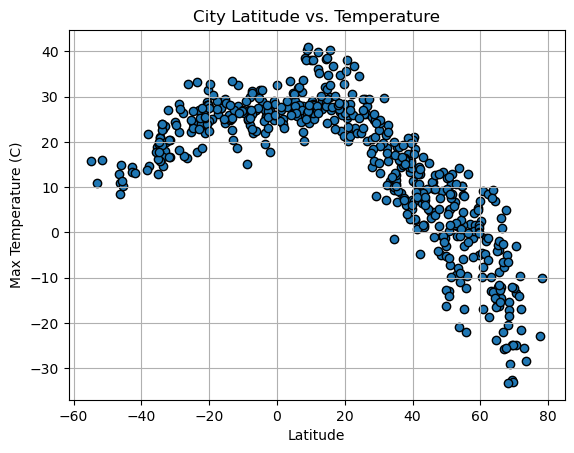

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

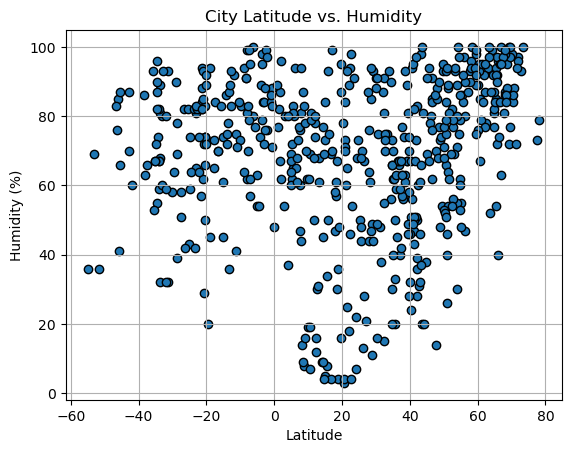

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

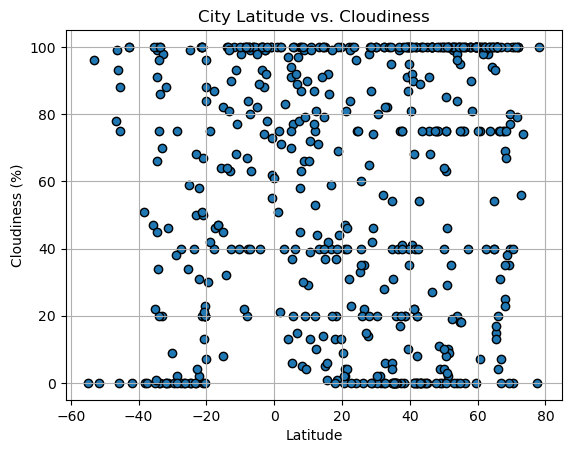

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

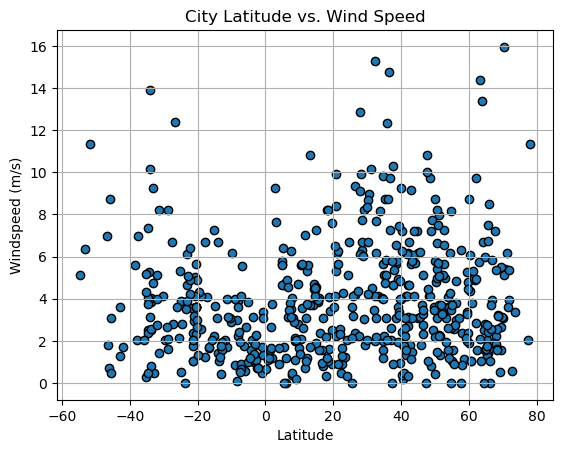

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Windspeed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
norther_hemi_filter_s = city_data_df['Lat'] >= 0
northern_hemi_df = city_data_df[norther_hemi_filter_s]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,17.22,63,20,5.66,PT,1680532313
4,villa guerrero,18.8667,-99.6500,22.37,36,69,1.62,MX,1680532551
5,hofn,64.2539,-15.2082,7.01,93,100,6.69,IS,1680532361
8,katsuura,35.1333,140.3000,10.76,62,0,5.13,JP,1680532348
9,hilo,19.7297,-155.0900,21.27,95,100,0.89,US,1680532315


In [21]:
~norther_hemi_filter_s.head()

City_ID
0    False
1     True
2     True
3     True
4    False
Name: Lat, dtype: bool

In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[~norther_hemi_filter_s]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,luderitz,-26.6481,15.1594,16.32,82,0,12.39,NaN,1680532383
2,saldanha,-33.0117,17.9442,17.88,80,70,4.74,ZA,1680532357
3,punta arenas,-53.1500,-70.9167,11.01,69,96,6.34,CL,1680532255
6,hobart,-42.8794,147.3294,14.47,87,100,3.60,AU,1680532088
7,amahai,-3.3333,128.9167,25.67,84,100,1.01,ID,1680532319


In [27]:
def linear_regression(df, x_col_name, y_col_name, hemi_name):

    # Define a function to create Linear Regression plots
    x_values = df[x_col_name]
    y_values = df[y_col_name]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col_name} vs {x_col_name} for {hemi_name} hemisphere")
    #plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
    plt.annotate(line_eq, fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7935629934145332


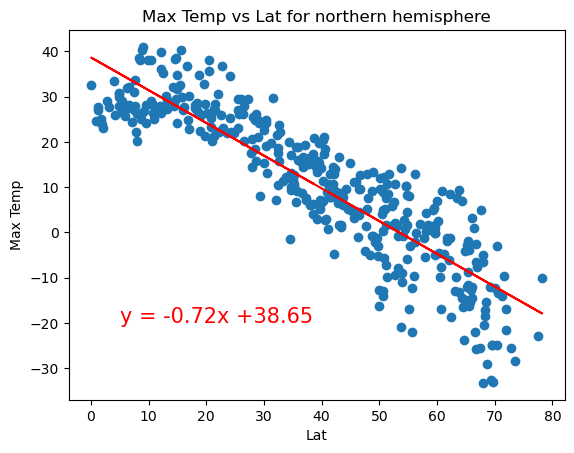

In [34]:
# Linear regression on Northern Hemisphere
# Perform a linear regression on latitude vs max temp
linear_regression(northern_hemi_df, "Lat", "Max Temp", "northern")

The r-value is: 0.4441986176888746


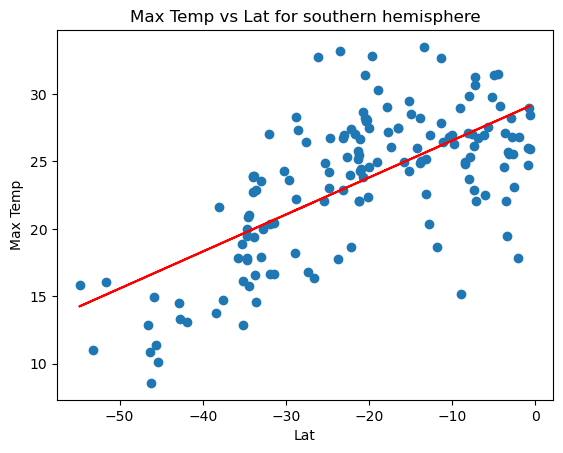

In [40]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Max Temp", "southern")

The r-value is: 0.4441986176888746


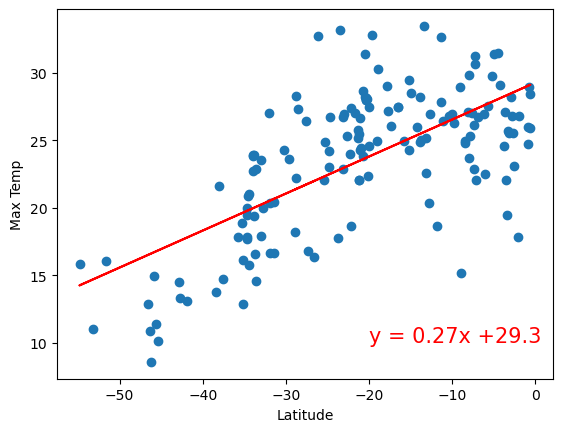

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (-20,10), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06987893199722724


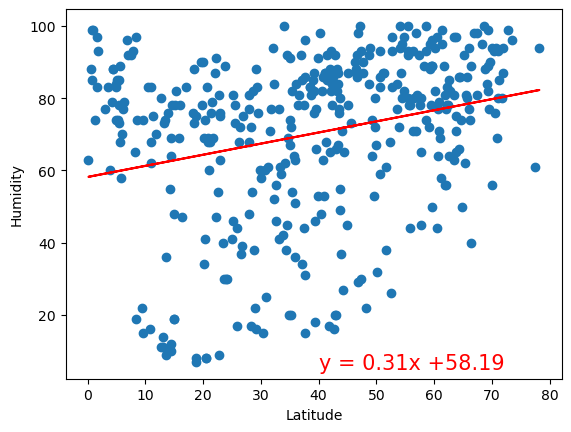

In [ ]:
# Northern Hemisphere
# Perform a linear regression on latitude vs humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.12319989509446841


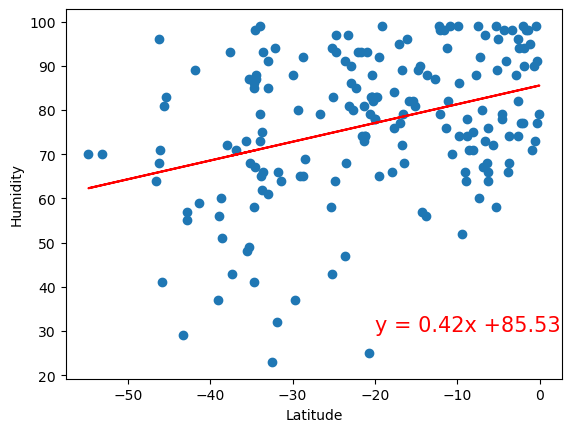

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0002808747046324607


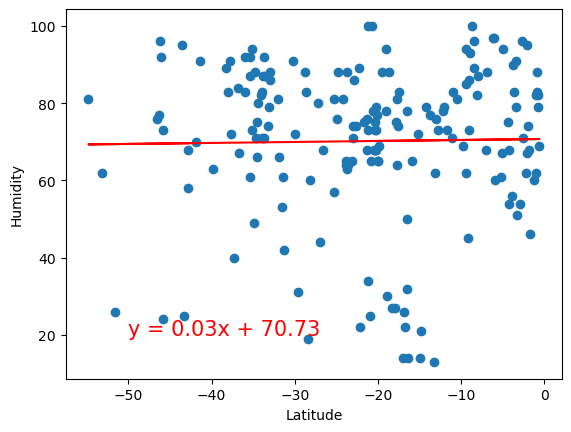

In [ ]:
# # Southern Hemisphere
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Humidity"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# # Get regression values
# regress_values = x_values * slope + intercept

# line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# # Print r value
# print(f"The r-value is: {rvalue**2}")

# # Show plot
# plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.048471563967218544


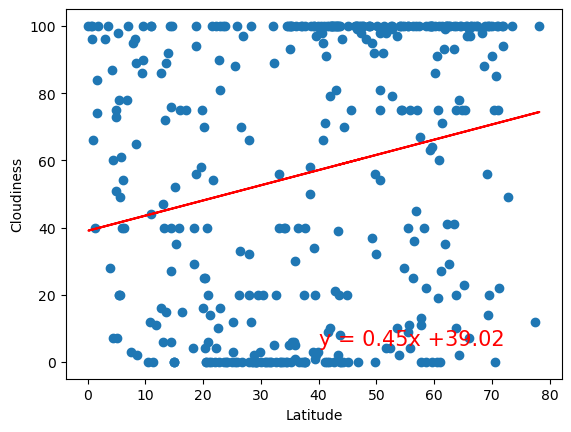

In [ ]:
# Northern Hemisphere
# Perform a linear regression on latitude vs cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(40,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.14936088523264354


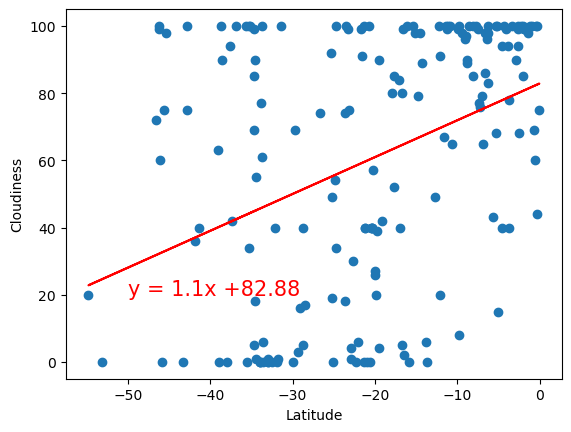

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.02056735429994368


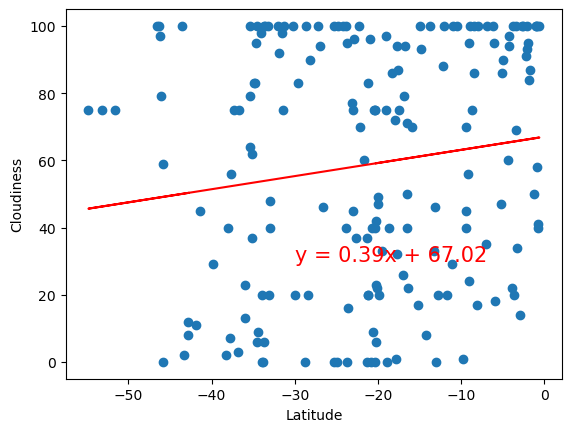

In [ ]:
# # Southern Hemisphere
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Cloudiness"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# # Get regression values
# regress_values = x_values * slope + intercept

# line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# plt.annotate(line_eq,(40,5),fontsize=15,color="red")

# # Print r value
# print(f"The r-value is: {rvalue**2}")

# # Show plot
# plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03882758441452553


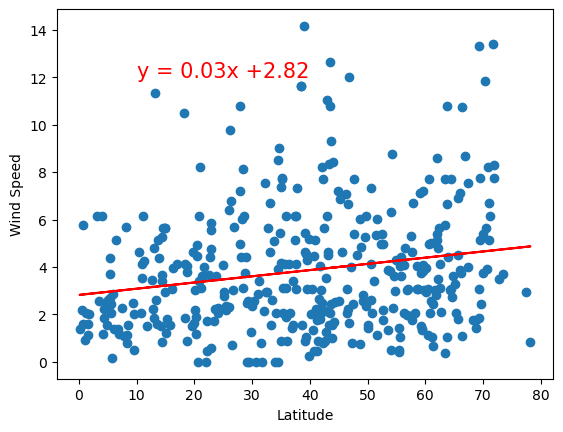

In [ ]:
# Northern Hemisphere
# Perform a linear regression on latitude vs wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.1041904478494723


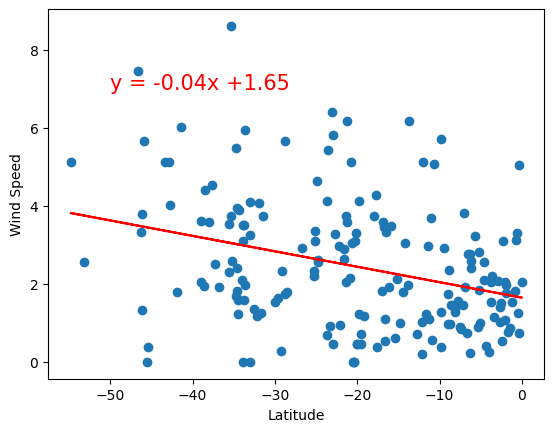

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,7),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.062239040700515696


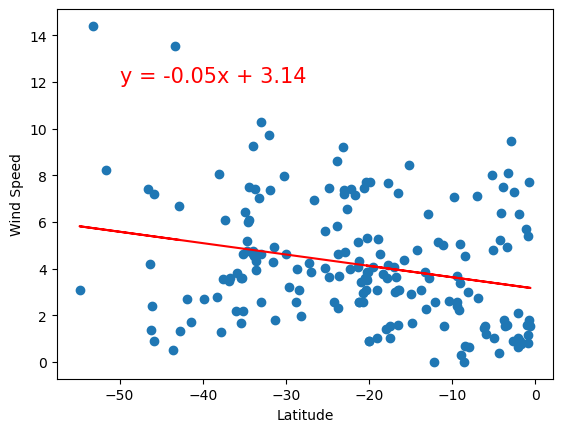

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE